In [1]:
import os
os.chdir("../")

In [2]:
from hebe.active_learning.simulation import active_learning_moon_simulation
from hebe.nn_models.feed_forward_nn import Classifier, MCDropoutClassifier
from hebe.config import Config

/Users/marko.sahan/anaconda3/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
config = Config()
model = MCDropoutClassifier(
    config.nn_parameters,
    config.active_learning,
    config.mc_dropout
)


First loss: 0.6582586765289307
Last loss: 0.18098948895931244


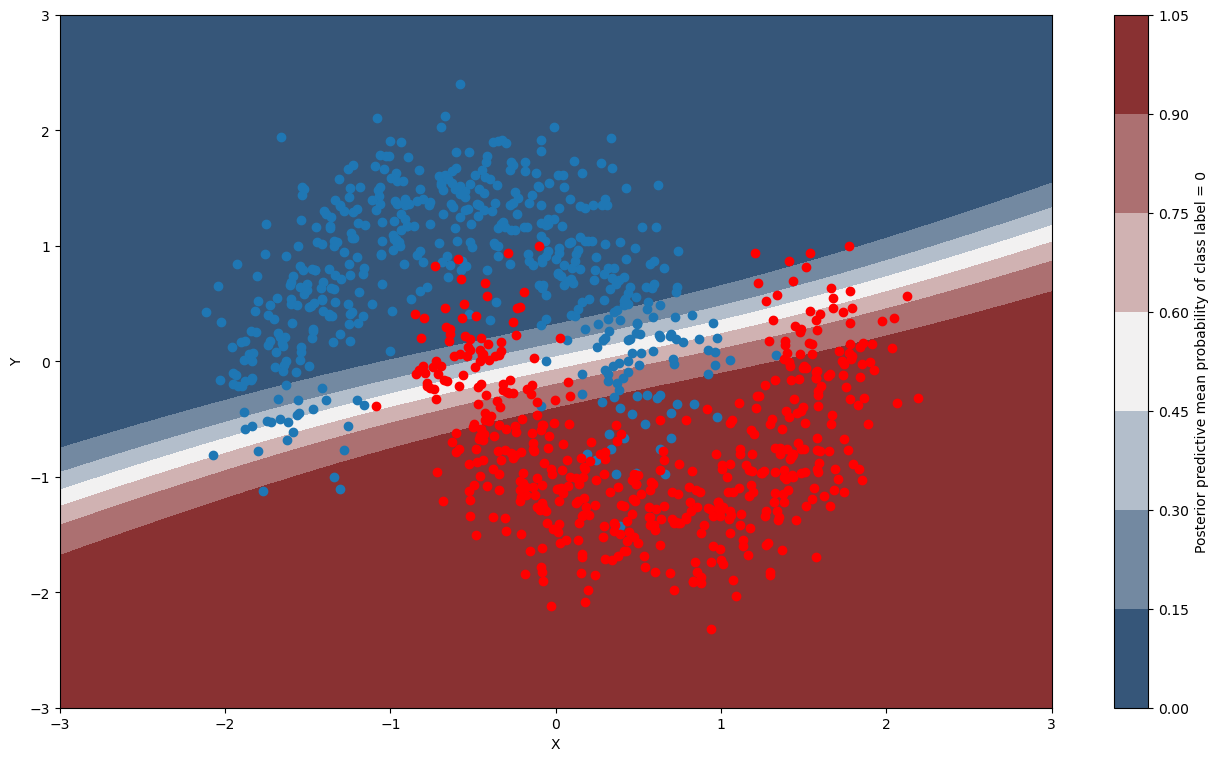

Iteration 0 if finished with AUC = 0.948 ... 

First loss: 0.32300370931625366
Last loss: 0.2773376405239105


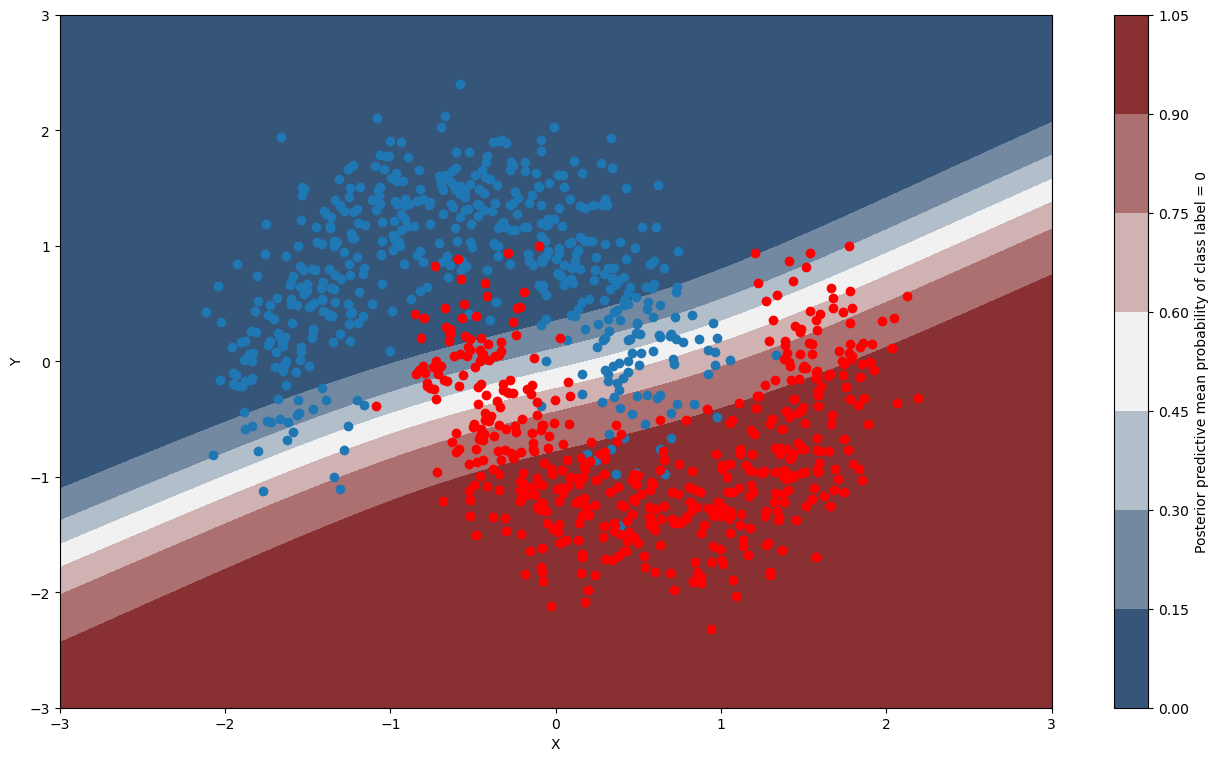

Iteration 1 if finished with AUC = 0.955 ... 

First loss: 0.2966628968715668
Last loss: 0.23467351496219635


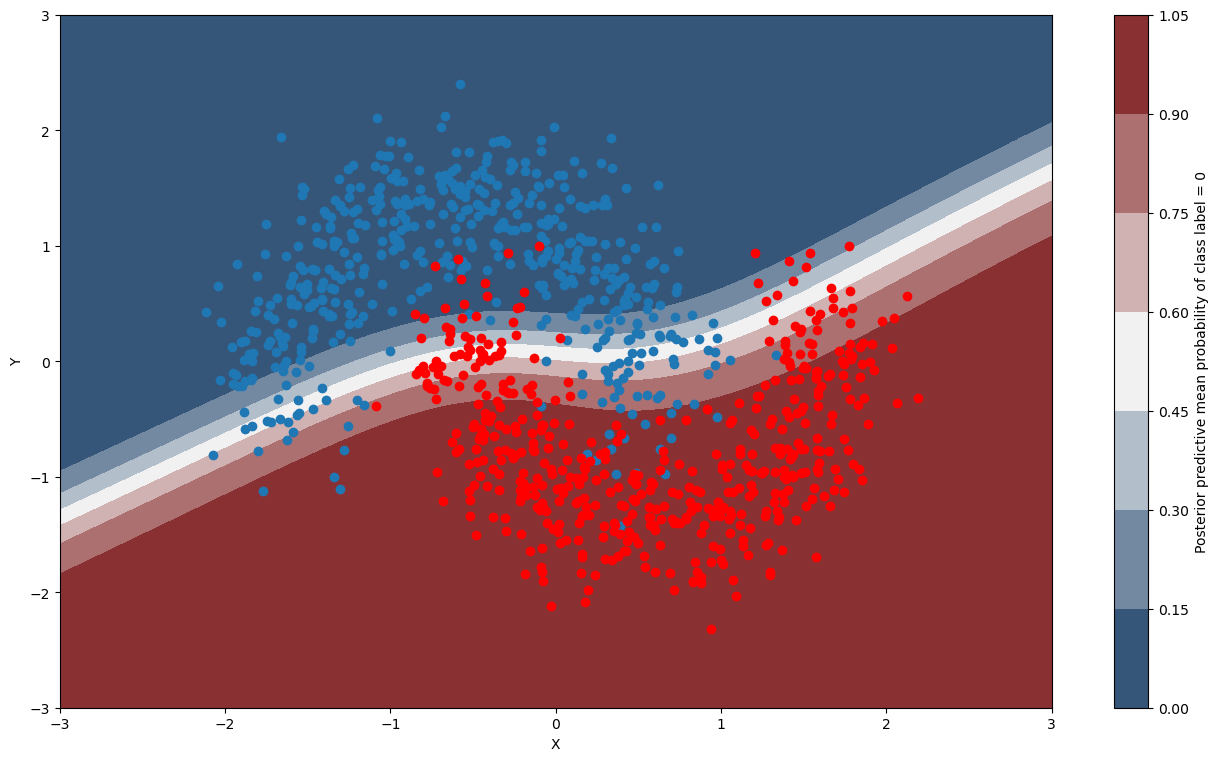

Iteration 2 if finished with AUC = 0.963 ... 

First loss: 0.2019069790840149
Last loss: 0.20648498833179474


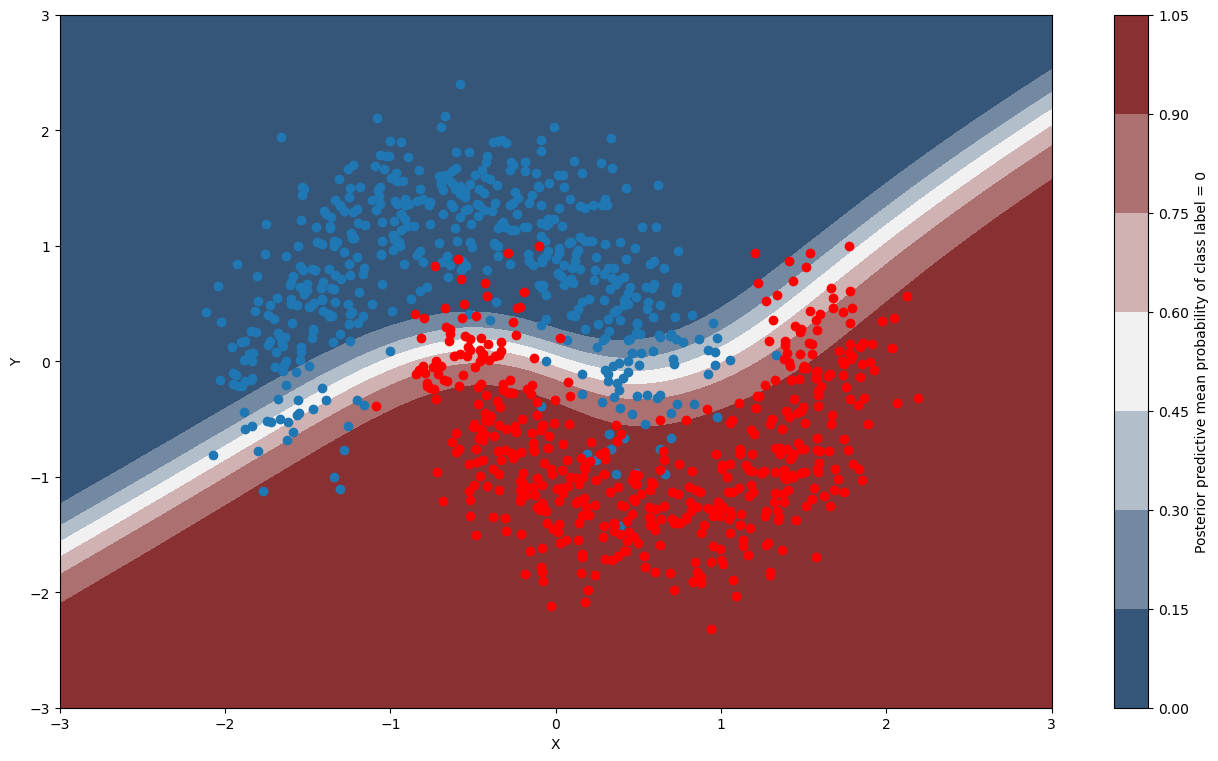

Iteration 3 if finished with AUC = 0.972 ... 

First loss: 0.1944841593503952
Last loss: 0.20210959017276764


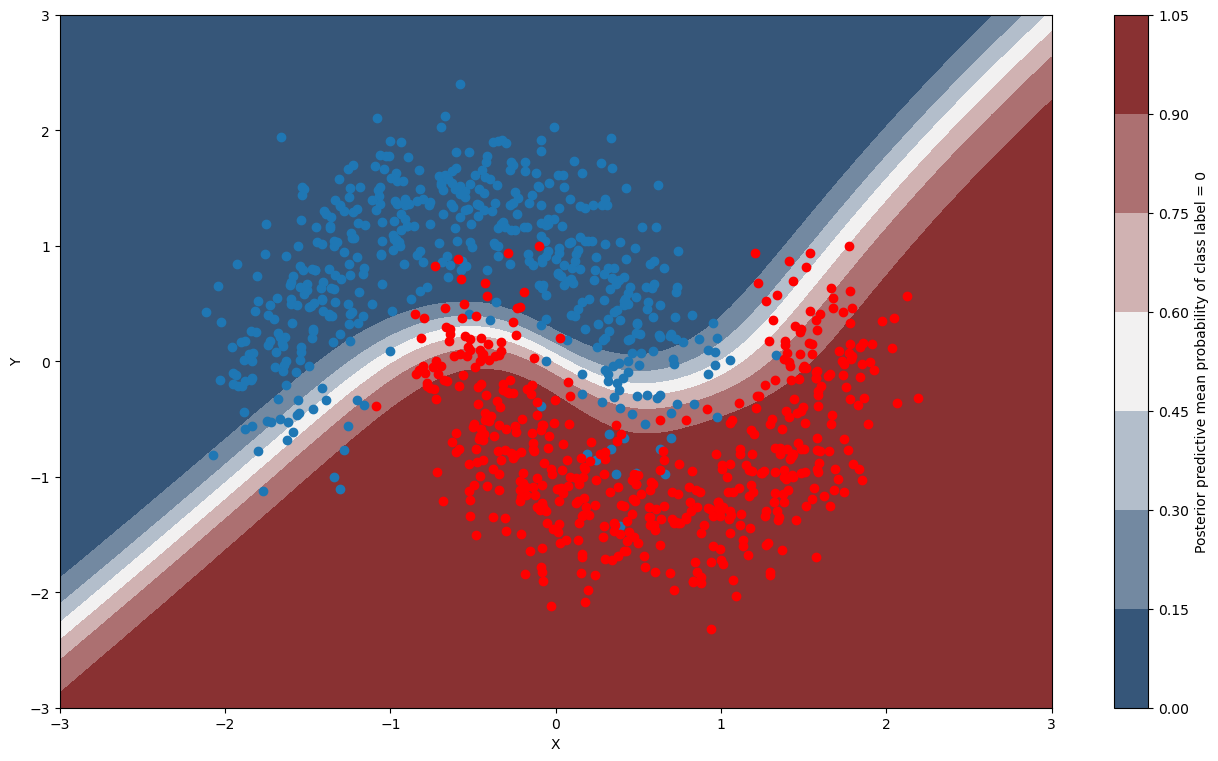

Iteration 4 if finished with AUC = 0.979 ... 

First loss: 0.7090470194816589
Last loss: 0.2865122854709625


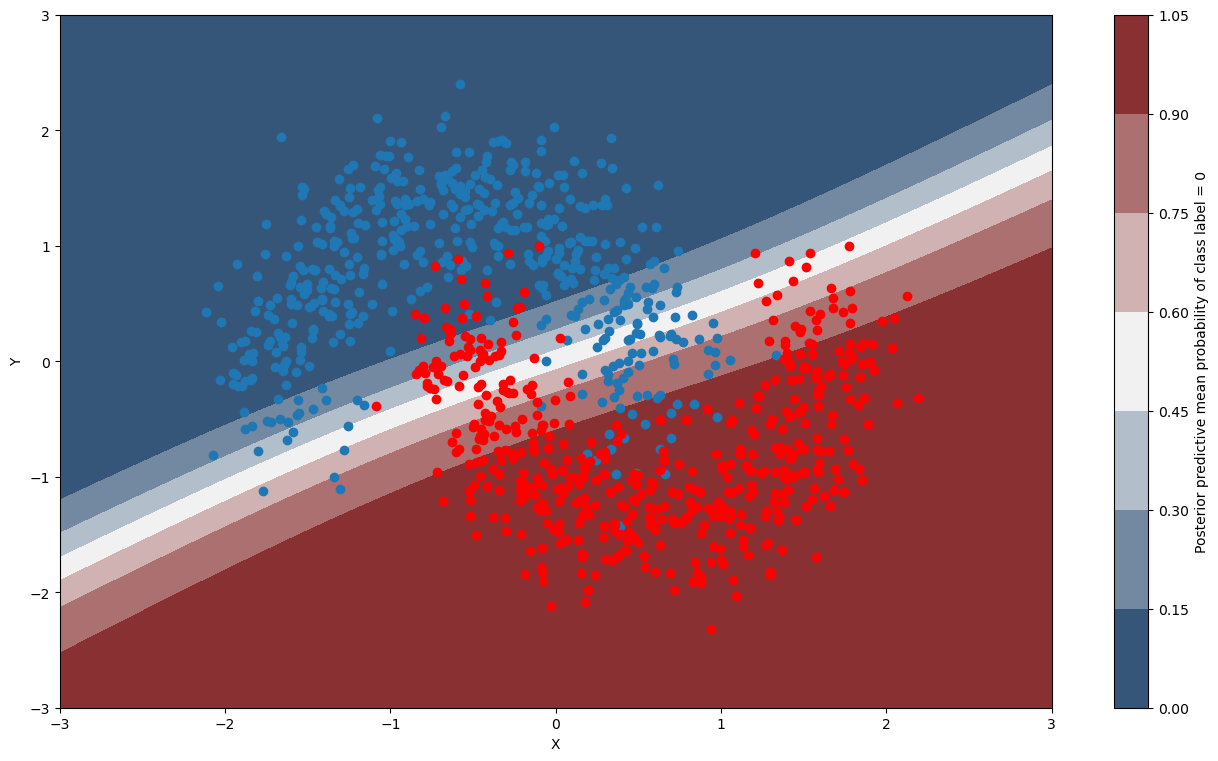

Iteration 0 if finished with AUC = 0.952 ... 

First loss: 0.2500733435153961
Last loss: 0.20745116472244263


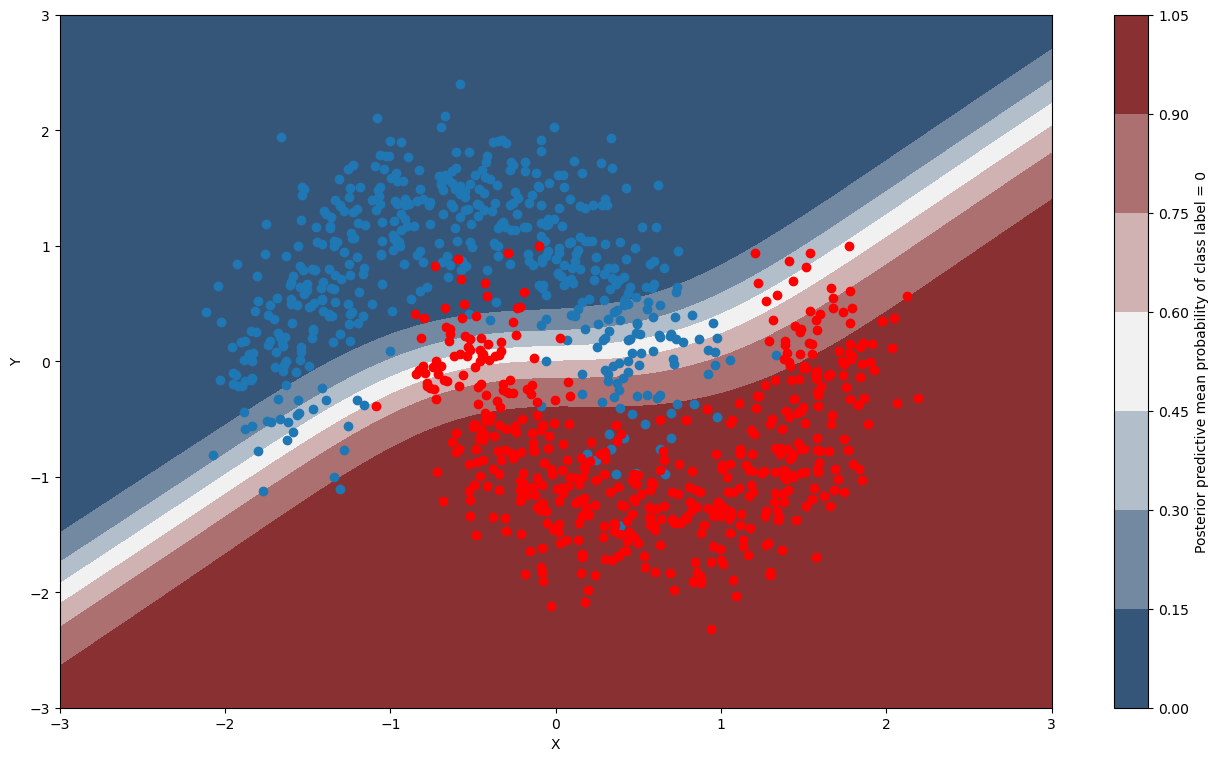

Iteration 1 if finished with AUC = 0.962 ... 

First loss: 0.2047034353017807
Last loss: 0.18014173209667206


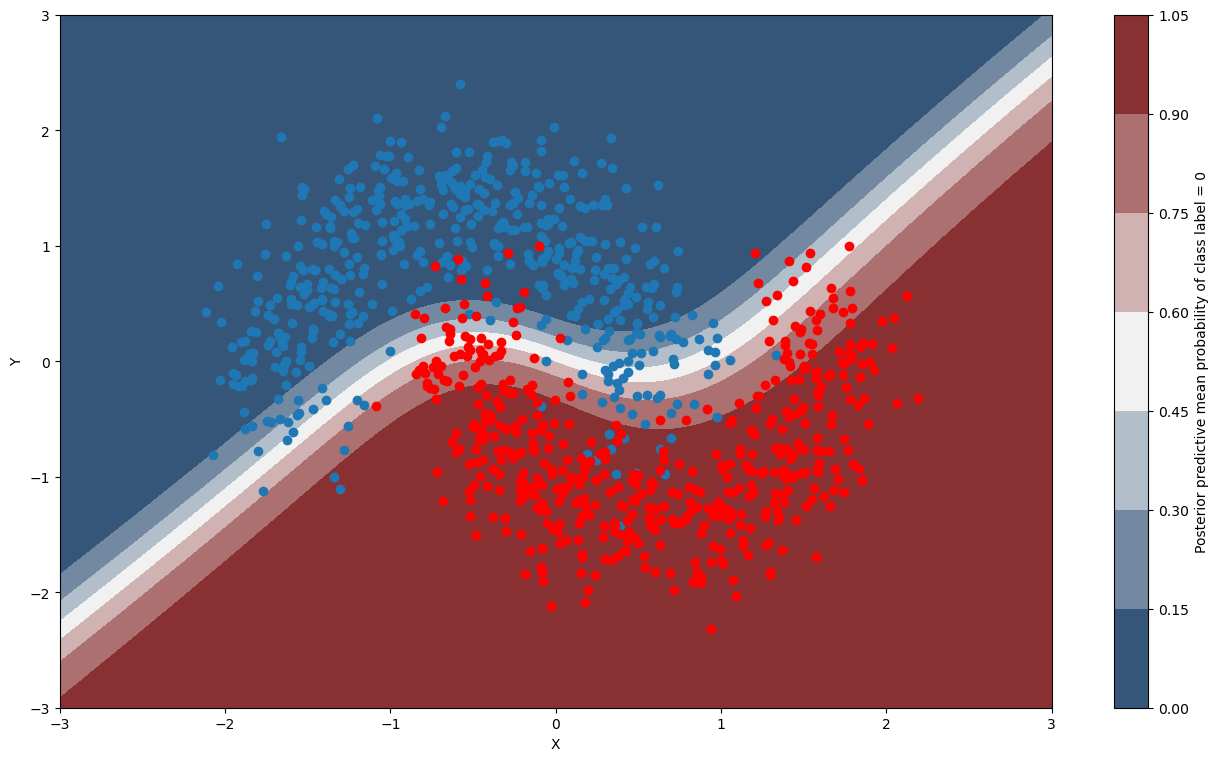

Iteration 2 if finished with AUC = 0.976 ... 

First loss: 0.18296462297439575
Last loss: 0.15582305192947388


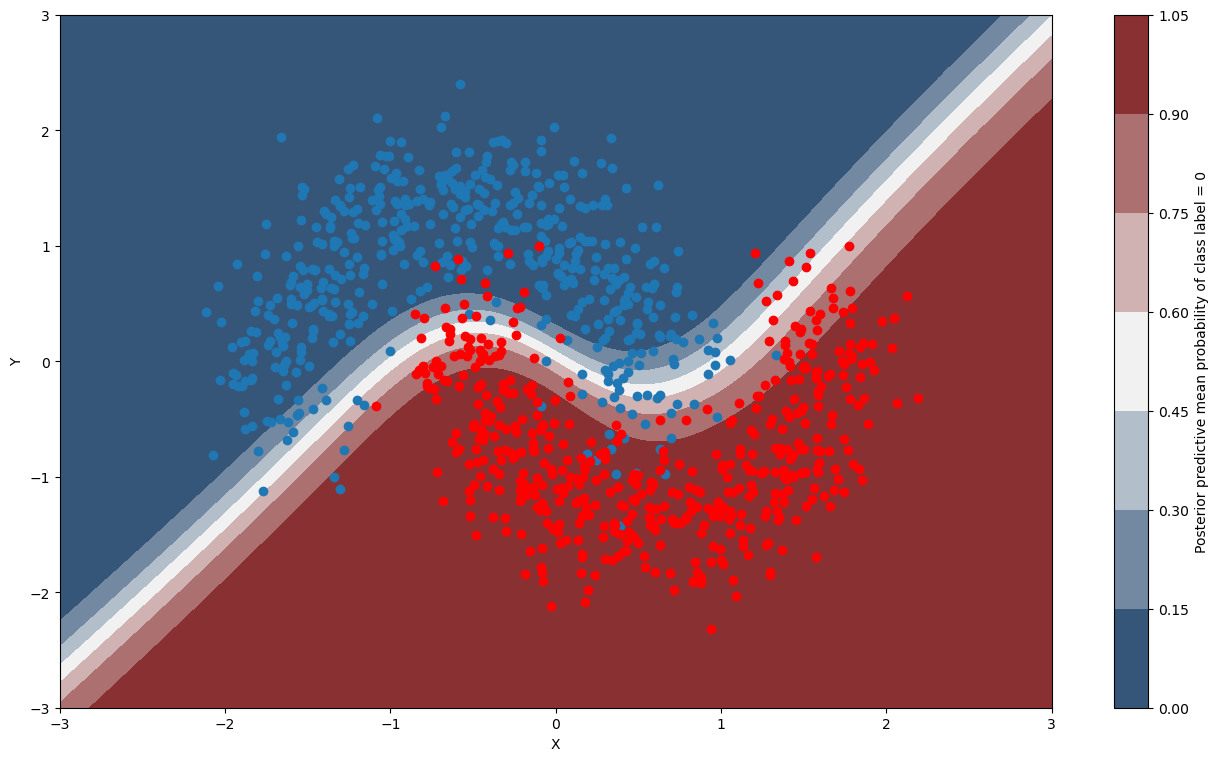

Iteration 3 if finished with AUC = 0.982 ... 

First loss: 0.17454372346401215
Last loss: 0.14921219646930695


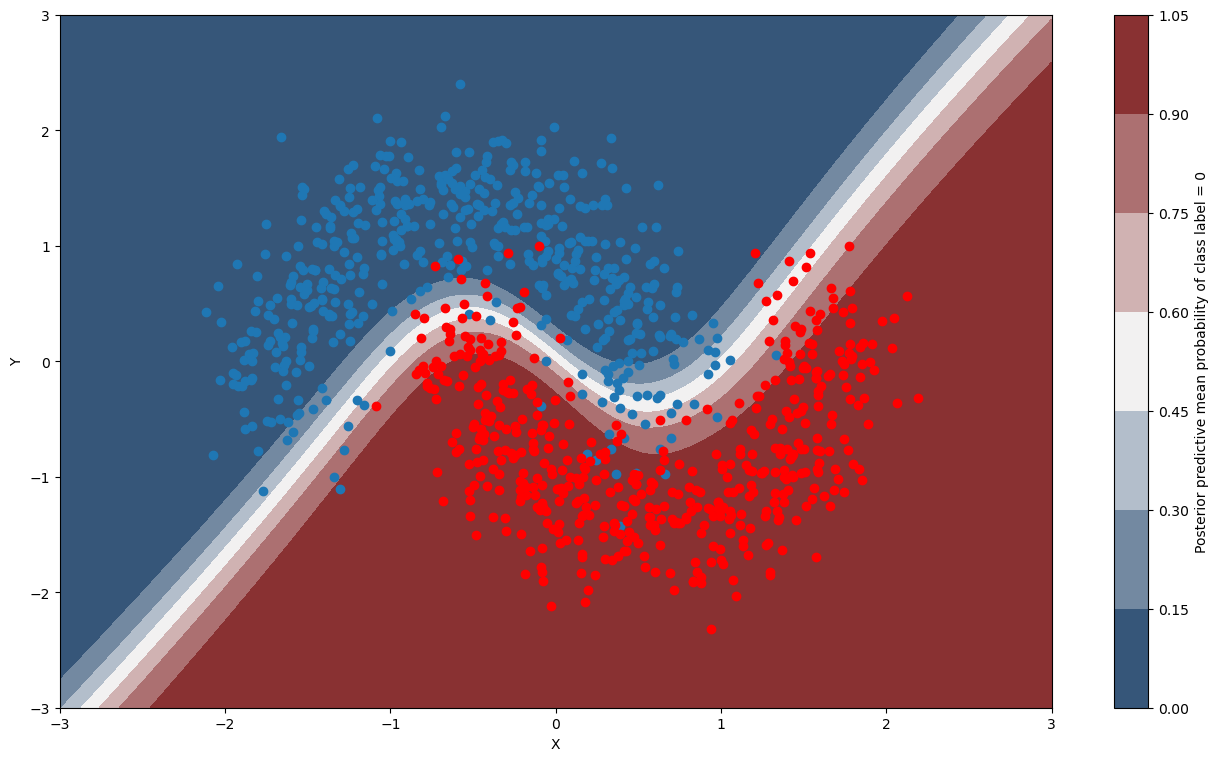

Iteration 4 if finished with AUC = 0.987 ... 



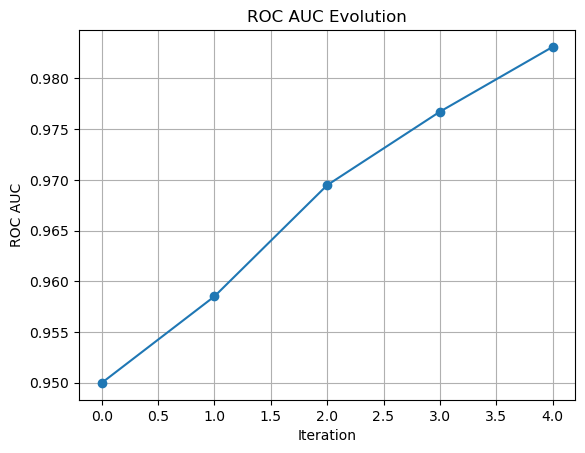

In [4]:
active_learning_moon_simulation(config.simulation, model)